In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import load_model
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random

In [3]:
class imagePreprocessing:
    def __init__(self, width, height):
        self.width = width
        self.height = height
    
    def resizeImage(self, image):
        return cv2.resize(image, (self.width, self.height), cv2.INTER_AREA)

In [4]:
class data:
    def __init__(self, preprocessing):
        self.preprocessing = preprocessing
        self.trainingData = []
        
    def loadData(self, dataDir):
        ageGroups = ["1-5", "6-10", "11-15", "16-18", "19-21","22-30", "31-44", "45-60", "61-80", "81-115"]
        for ageGroup in ageGroups:
            path = os.path.join(dataDir, ageGroup)
            classIndex = ageGroups.index(ageGroup)
            for image in os.listdir(path):
                imageArray = cv2.imread(os.path.join(path, image), 0)
                imageArray = self.preprocessing.resizeImage(imageArray)
                self.trainingData.append([imageArray, classIndex])   



In [5]:
data = data(imagePreprocessing(120, 120))
data.loadData(r"C:\Users\Acer\OneDrive - University of Venda\Documents\facedata\ageroups\training")
random.shuffle(data.trainingData)

In [6]:
x_train = []
y_train = []

In [7]:
for features, labels in data.trainingData:
    x_train.append(features)
    y_train.append(labels)
    

imgSize = 120
x_train = np.array(x_train).reshape(-1, imgSize, imgSize, 1)
# Normalizin
x_train = x_train / 255.0

In [8]:
len(x_train)

22557

In [9]:
y_train = np.array(y_train)

In [10]:
class data:
    def __init__(self, preprocessing):
        self.preprocessing = preprocessing
        self.trainingData = []
        
    def loadData(self, dataDir):
        ageGroups = ["1-5", "6-10", "11-15", "16-18", "19-21","22-30", "31-44", "45-60", "61-80", "81-115"]
        for ageGroup in ageGroups:
            path = os.path.join(dataDir, ageGroup)
            classIndex = ageGroups.index(ageGroup)
            for image in os.listdir(path):
                imageArray = cv2.imread(os.path.join(path, image), 0)
                imageArray = self.preprocessing.resizeImage(imageArray)
                self.trainingData.append([imageArray, classIndex])   

In [11]:
data = data(imagePreprocessing(120, 120))
data.loadData(r"C:\Users\Acer\OneDrive - University of Venda\Documents\facedata\ageroups\testing")
random.shuffle(data.trainingData)

In [12]:
x_test = []
y_test = []

In [13]:
for features, labels in data.trainingData:
    x_test.append(features)
    y_test.append(labels)
    

imgSize = 120
x_test = np.array(x_test).reshape(-1, imgSize, imgSize, 1)
# Normalizing
x_test= x_test / 255.0

In [14]:
len(x_test)

1192

In [15]:
y_test = np.array(y_test)

In [16]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
 

model.add(Flatten())
model.add(Dense(64))


model.add(Dense(10)) 
model.add(Activation("softmax"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 118, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 118, 118, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 57, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 57, 57, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=32, steps_per_epoch=len(x_train), epochs=20, validation_data=(x_test,y_test))


Epoch 1/20
14100/22557 [=================>............] - 15503s 1s/step - loss: 0.6270 - accuracy: 0.7558 - val_loss: 2.8311 - val_accuracy: 0.5201


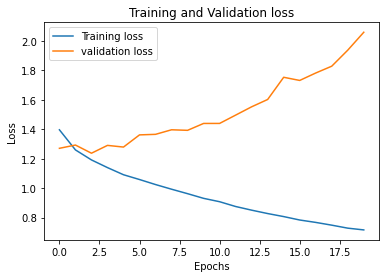

In [43]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,35)
plt.plot(loss_train, label='Training loss')
plt.plot(loss_val, label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

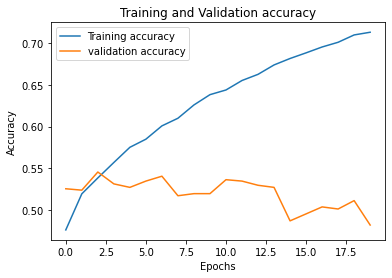

In [46]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,5)
plt.plot(loss_train, label='Training accuracy')
plt.plot(loss_val, label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [50]:
model.save('cnn training.cnn')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: cnn training.cnn\assets


In [73]:
class AgeGroupPrediction:
    def __init__(self, model):
        self.model = model
        
    def predictAgeGroup(self, imagePath, imageName):
        
    
            
        imageFile = os.path.join(imagePath, imageName)  
        imageArray = cv2.imread(imageFile, 0)
        imageArray = cv2.resize(imageArray, (120, 120), cv2.INTER_AREA) 
        imageArray = np.array(imageArray).reshape(-1, 120, 120, 1)
        imageArray = imageArray / 255.0
    
        
        probability =  self.model.predict(imageArray)
        classes = probability.argmax(axis=1)
        classIndex = classes[0]
        
        ageGroups = ["1-5", "6-10", "11-15", "16-18", "19-21","22-30", "31-44", "45-60", "61-80", "81-115"]
        return ageGroups[classIndex]


In [75]:
imagePath = "C:\Users\Acer\OneDrive - University of Venda\Documents\facedata\ageroups\testing\11-15"
imageName = "11_1_0_20170109205013531.jpg.chip.jpg"

print (imageName)
predictionClass = AgeGroupPrediction(model)
predictedAgeGroup = predictionClass.predictAgeGroup(imagePath, imageName)
predictedAgeGroup

11_1_0_20170109205013531.jpg.chip.jpg


'11-15'

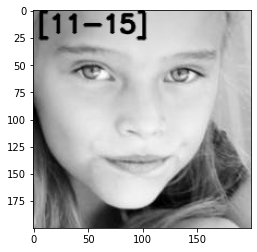

In [76]:
image = cv2.imread(os.path.join(imagePath, imageName),0)
cv2.putText(image, "["+str(predictedAgeGroup)+"]",
            (4, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
plt.imshow(image, cmap="gray")

In [77]:
imagePath = r"C:\Users\Acer\OneDrive - University of Venda\Pictures\me"
imageName = "20190323_191510.jpg"

print (imageName)
predictionClass = AgeGroupPrediction(model)
predictedAgeGroup = predictionClass.predictAgeGroup(imagePath, imageName)
predictedAgeGroup

20190323_191510.jpg


'61-80'

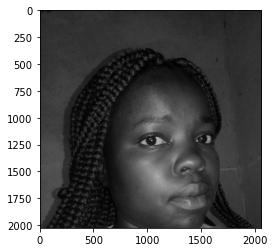

In [78]:
image = cv2.imread(os.path.join(imagePath, imageName),0)
cv2.putText(image, "["+str(predictedAgeGroup)+"]",
            (4, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
plt.imshow(image, cmap="gray")

In [88]:
imagePath = r"C:\Users\Acer\OneDrive - University of Venda\Documents\facedata\ageroups\testing\16-18"
imageName = "18_1_0_20170109214753528.jpg.chip.jpg"

print (imageName)
predictionClass = AgeGroupPrediction(model)
predictedAgeGroup = predictionClass.predictAgeGroup(imagePath, imageName)
predictedAgeGroup

18_1_0_20170109214753528.jpg.chip.jpg


'6-10'

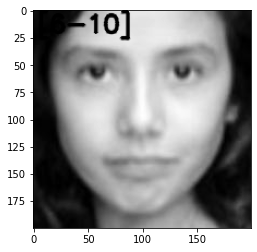

In [89]:
image = cv2.imread(os.path.join(imagePath, imageName),0)
cv2.putText(image, "["+str(predictedAgeGroup)+"]",
            (4, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
plt.imshow(image, cmap="gray")

In [86]:
imagePath = r"C:\Users\Acer\OneDrive - University of Venda\Pictures\friends"
imageName = "thabi.jpg"

print (imageName)
predictionClass = AgeGroupPrediction(model)
predictedAgeGroup = predictionClass.predictAgeGroup(imagePath, imageName)
predictedAgeGroup

thabi.jpg


'61-80'

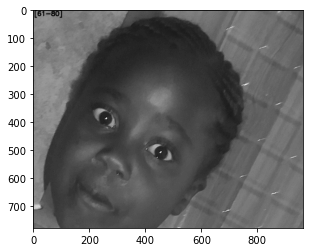

In [87]:
image = cv2.imread(os.path.join(imagePath, imageName),0)
cv2.putText(image, "["+str(predictedAgeGroup)+"]",
            (4, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
plt.imshow(image, cmap="gray")

In [90]:
imagePath = r"C:\Users\Acer\OneDrive - University of Venda\Documents\facedata\ageroups\testing\16-18"
imageName = "18_1_0_20170109214753528.jpg.chip.jpg"

print (imageName)
predictionClass = AgeGroupPrediction(model)
predictedAgeGroup = predictionClass.predictAgeGroup(imagePath, imageName)
predictedAgeGroup

18_1_0_20170109214753528.jpg.chip.jpg


'6-10'

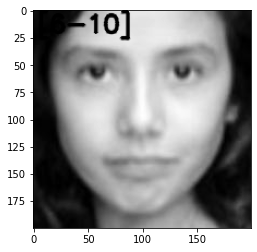

In [91]:
image = cv2.imread(os.path.join(imagePath, imageName),0)
cv2.putText(image, "["+str(predictedAgeGroup)+"]",
            (4, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
plt.imshow(image, cmap="gray")

In [92]:
imagePath = r"C:\Users\Acer\OneDrive - University of Venda\Documents\facedata\ageroups\testing\6-10"
imageName = "9_0_0_20170110222903669.jpg.chip.jpg"

print (imageName)
predictionClass = AgeGroupPrediction(model)
predictedAgeGroup = predictionClass.predictAgeGroup(imagePath, imageName)
predictedAgeGroup

9_0_0_20170110222903669.jpg.chip.jpg


'11-15'

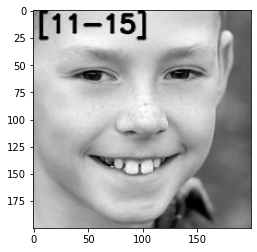

In [93]:
image = cv2.imread(os.path.join(imagePath, imageName),0)
cv2.putText(image, "["+str(predictedAgeGroup)+"]",
            (4, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
plt.imshow(image, cmap="gray")

In [97]:
imagePath = r"C:\Users\Acer\OneDrive - University of Venda\Documents\facedata\ageroups\testing\11-15"
imageName = "13_1_4_20170103200733438.jpg.chip.jpg"

print (imageName)
predictionClass = AgeGroupPrediction(model)
predictedAgeGroup = predictionClass.predictAgeGroup(imagePath, imageName)
predictedAgeGroup


13_1_4_20170103200733438.jpg.chip.jpg


'6-10'

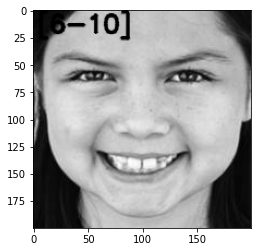

In [98]:
image = cv2.imread(os.path.join(imagePath, imageName),0)
cv2.putText(image, "["+str(predictedAgeGroup)+"]",
            (4, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
plt.imshow(image, cmap="gray")

In [99]:
imagePath = r"C:\Users\Acer\OneDrive - University of Venda\Documents\facedata\ageroups\testing\11-15"
imageName = "14_0_0_20170110232651186.jpg.chip.jpg"

print (imageName)
predictionClass = AgeGroupPrediction(model)
predictedAgeGroup = predictionClass.predictAgeGroup(imagePath, imageName)
predictedAgeGroup

14_0_0_20170110232651186.jpg.chip.jpg


'11-15'

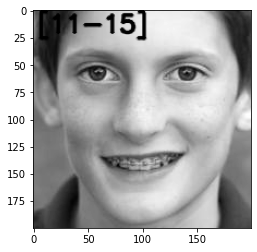

In [100]:
image = cv2.imread(os.path.join(imagePath, imageName),0)
cv2.putText(image, "["+str(predictedAgeGroup)+"]",
            (4, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
plt.imshow(image, cmap="gray")

In [102]:
imagePath = r"C:\Users\Acer\OneDrive - University of Venda\Documents\facedata\ageroups\testing\16-18"
imageName = "18_1_1_20170109214221868.jpg.chip.jpg"

print (imageName)
predictionClass = AgeGroupPrediction(model)
predictedAgeGroup = predictionClass.predictAgeGroup(imagePath, imageName)
predictedAgeGroup

18_1_1_20170109214221868.jpg.chip.jpg


'22-30'

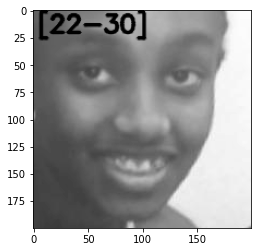

In [104]:
imagePath = r"C:\Users\Acer\OneDrive - University of Venda\Documents\facedata\ageroups\testing\16-18"
imageName = "17_1_2_20170104020251980.jpg.chip.jpg"

print (imageName)
predictionClass = AgeGroupPrediction(model)
predictedAgeGroup = predictionClass.predictAgeGroup(imagePath, imageName)
predictedAgeGroup

17_1_2_20170104020251980.jpg.chip.jpg


'22-30'

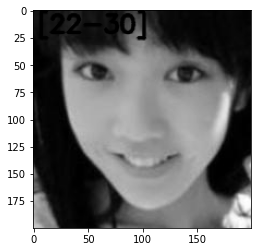

In [105]:
image = cv2.imread(os.path.join(imagePath, imageName),0)
cv2.putText(image, "["+str(predictedAgeGroup)+"]",
            (4, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
plt.imshow(image, cmap="gray")

In [108]:
imagePath = r"C:\Users\Acer\OneDrive - University of Venda\Documents\facedata\ageroups\testing\19-21"
imageName = "20_1_1_20170117132642224.jpg.chip.jpg"

print (imageName)
predictionClass = AgeGroupPrediction(model)
predictedAgeGroup = predictionClass.predictAgeGroup(imagePath, imageName)
predictedAgeGroup

20_1_1_20170117132642224.jpg.chip.jpg


'31-44'

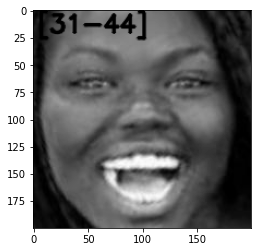

In [109]:
image = cv2.imread(os.path.join(imagePath, imageName),0)
cv2.putText(image, "["+str(predictedAgeGroup)+"]",
            (4, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
plt.imshow(image, cmap="gray")

In [110]:
imagePath = r"C:\Users\Acer\OneDrive - University of Venda\Documents\facedata\ageroups\testing\19-21"
imageName = "21_1_2_20170116164805815.jpg.chip.jpg"

print (imageName)
predictionClass = AgeGroupPrediction(model)
predictedAgeGroup = predictionClass.predictAgeGroup(imagePath, imageName)
predictedAgeGroup

21_1_2_20170116164805815.jpg.chip.jpg


'22-30'

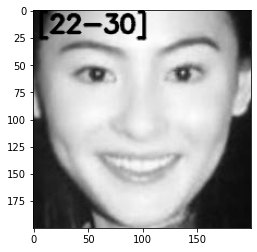

In [111]:
image = cv2.imread(os.path.join(imagePath, imageName),0)
cv2.putText(image, "["+str(predictedAgeGroup)+"]",
            (4, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
plt.imshow(image, cmap="gray")

In [112]:
imagePath = r"C:\Users\Acer\OneDrive - University of Venda\Documents\facedata\ageroups\testing\19-21"
imageName = "21_1_4_20170103201905647.jpg.chip.jpg"

print (imageName)
predictionClass = AgeGroupPrediction(model)
predictedAgeGroup = predictionClass.predictAgeGroup(imagePath, imageName)
predictedAgeGroup

21_1_4_20170103201905647.jpg.chip.jpg


'11-15'

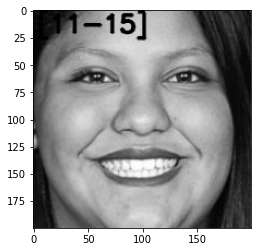

In [113]:
image = cv2.imread(os.path.join(imagePath, imageName),0)
cv2.putText(image, "["+str(predictedAgeGroup)+"]",
            (4, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
plt.imshow(image, cmap="gray")

In [114]:
imagePath = r"C:\Users\Acer\OneDrive - University of Venda\Documents\facedata\ageroups\testing\19-21"
imageName = "19_0_0_20170102233014401.jpg.chip.jpg"

print (imageName)
predictionClass = AgeGroupPrediction(model)
predictedAgeGroup = predictionClass.predictAgeGroup(imagePath, imageName)
predictedAgeGroup

19_0_0_20170102233014401.jpg.chip.jpg


'16-18'

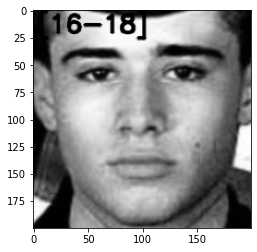

In [115]:
image = cv2.imread(os.path.join(imagePath, imageName),0)
cv2.putText(image, "["+str(predictedAgeGroup)+"]",
            (4, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
plt.imshow(image, cmap="gray")

In [117]:
imagePath = r"C:\Users\Acer\OneDrive - University of Venda\Documents\facedata\ageroups\testing\19-21"
imageName = "21_0_1_20170113145729669.jpg.chip.jpg"

print (imageName)
predictionClass = AgeGroupPrediction(model)
predictedAgeGroup = predictionClass.predictAgeGroup(imagePath, imageName)
predictedAgeGroup

21_0_1_20170113145729669.jpg.chip.jpg


'19-21'

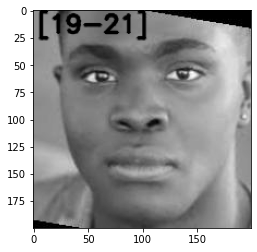

In [118]:
image = cv2.imread(os.path.join(imagePath, imageName),0)
cv2.putText(image, "["+str(predictedAgeGroup)+"]",
            (4, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
plt.imshow(image, cmap="gray")

In [122]:
imagePath = r"C:\Users\Acer\OneDrive - University of Venda\Documents\facedata\ageroups\testing\22-30"
imageName = "23_1_1_20170112234048553.jpg.chip.jpg"

print (imageName)
predictionClass = AgeGroupPrediction(model)
predictedAgeGroup = predictionClass.predictAgeGroup(imagePath, imageName)
predictedAgeGroup

23_1_1_20170112234048553.jpg.chip.jpg


'22-30'

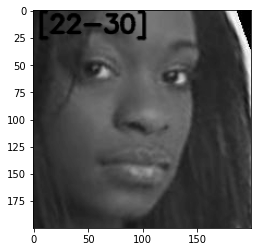

In [123]:
image = cv2.imread(os.path.join(imagePath, imageName),0)
cv2.putText(image, "["+str(predictedAgeGroup)+"]",
            (4, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
plt.imshow(image, cmap="gray")

In [126]:
imagePath = r"C:\Users\Acer\OneDrive - University of Venda\Pictures\fam"
imageName = "thabelo.jpg"

print (imageName)
predictionClass = AgeGroupPrediction(model)
predictedAgeGroup = predictionClass.predictAgeGroup(imagePath, imageName)
predictedAgeGroup


thabelo.jpg


'22-30'

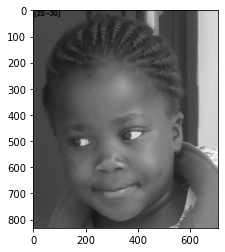

In [127]:
image = cv2.imread(os.path.join(imagePath, imageName),0)
cv2.putText(image, "["+str(predictedAgeGroup)+"]",
            (4, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
plt.imshow(image, cmap="gray")

In [128]:
imagePath = r"C:\Users\Acer\OneDrive - University of Venda\Pictures\fam"
imageName = "me.jpg"

print (imageName)
predictionClass = AgeGroupPrediction(model)
predictedAgeGroup = predictionClass.predictAgeGroup(imagePath, imageName)
predictedAgeGroup


me.jpg


'22-30'

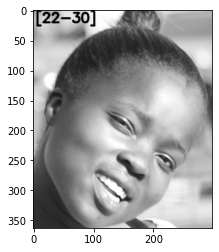

In [129]:
image = cv2.imread(os.path.join(imagePath, imageName),0)
cv2.putText(image, "["+str(predictedAgeGroup)+"]",
            (4, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
plt.imshow(image, cmap="gray")

In [130]:
imagePath = r"C:\Users\Acer\OneDrive - University of Venda\Pictures\fam"
imageName = "tsire.jpg"

print (imageName)
predictionClass = AgeGroupPrediction(model)
predictedAgeGroup = predictionClass.predictAgeGroup(imagePath, imageName)
predictedAgeGroup


tsire.jpg


'61-80'

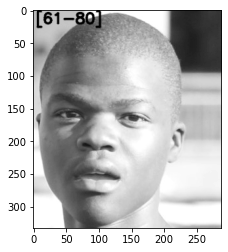

In [131]:
image = cv2.imread(os.path.join(imagePath, imageName),0)
cv2.putText(image, "["+str(predictedAgeGroup)+"]",
            (4, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
plt.imshow(image, cmap="gray")

In [132]:
imagePath = r"C:\Users\Acer\OneDrive - University of Venda\Pictures\fam"
imageName = "aa.jpg"

print (imageName)
predictionClass = AgeGroupPrediction(model)
predictedAgeGroup = predictionClass.predictAgeGroup(imagePath, imageName)
predictedAgeGroup


aa.jpg


'81-100'

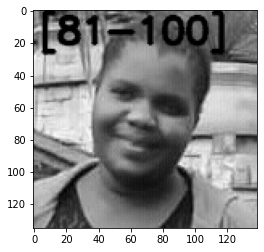

In [133]:
image = cv2.imread(os.path.join(imagePath, imageName),0)
cv2.putText(image, "["+str(predictedAgeGroup)+"]",
            (4, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
plt.imshow(image, cmap="gray")

In [134]:
imagePath = r"C:\Users\Acer\OneDrive - University of Venda\Pictures\me"
imageName = "amanda.jpg"

print (imageName)
predictionClass = AgeGroupPrediction(model)
predictedAgeGroup = predictionClass.predictAgeGroup(imagePath, imageName)
predictedAgeGroup


amanda.jpg


'11-15'

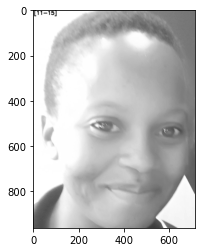

In [142]:
image = cv2.imread(os.path.join(imagePath, imageName),0)
cv2.putText(image, "["+str(predictedAgeGroup)+"]",
            (4, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
plt.imshow(image, cmap="gray")

In [144]:
imagePath = r"C:\Users\Acer\OneDrive - University of Venda\Pictures\friends"
imageName = "ama.jpg"

print (imageName)
predictionClass = AgeGroupPrediction(model)
predictedAgeGroup = predictionClass.predictAgeGroup(imagePath, imageName)
predictedAgeGroup


ama.jpg


'22-30'

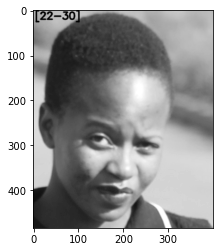

In [145]:
image = cv2.imread(os.path.join(imagePath, imageName),0)
cv2.putText(image, "["+str(predictedAgeGroup)+"]",
            (4, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
plt.imshow(image, cmap="gray")

In [148]:
imagePath = r"C:\Users\Acer\OneDrive - University of Venda\Pictures\friends"
imageName = "rothe.jpg"

print (imageName)
predictionClass = AgeGroupPrediction(model)
predictedAgeGroup = predictionClass.predictAgeGroup(imagePath, imageName)
predictedAgeGroup

rothe.jpg


'16-18'

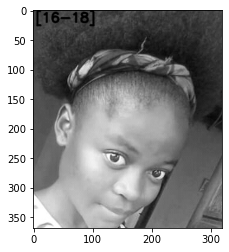

In [149]:
image = cv2.imread(os.path.join(imagePath, imageName),0)
cv2.putText(image, "["+str(predictedAgeGroup)+"]",
            (4, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
plt.imshow(image, cmap="gray")

In [151]:
imagePath = r"C:\Users\Acer\OneDrive - University of Venda\Pictures\us"
imageName = "ndani.jpg"

print (imageName)
predictionClass = AgeGroupPrediction(model)
predictedAgeGroup = predictionClass.predictAgeGroup(imagePath, imageName)
predictedAgeGroup

ndani.jpg


'11-15'

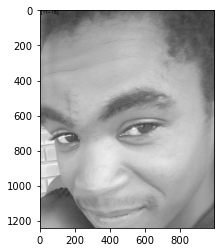

In [152]:
image = cv2.imread(os.path.join(imagePath, imageName),0)
cv2.putText(image, "["+str(predictedAgeGroup)+"]",
            (4, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
plt.imshow(image, cmap="gray")

In [153]:
imagePath = r"C:\Users\Acer\OneDrive - University of Venda\Pictures\us"
imageName = "wawa.jpg"

print (imageName)
predictionClass = AgeGroupPrediction(model)
predictedAgeGroup = predictionClass.predictAgeGroup(imagePath, imageName)
predictedAgeGroup

wawa.jpg


'11-15'